In [5]:
# math and robotics
from pathlib import Path
import sys
import numpy as np
import spatialmath as sm

# ROS
import rospy
import hrr_common
# from hrr_common.ros_utils.record_helper import stop_record

from hrr_cobot_robot import UnscrewingSkill, HrrCobotControl, record_skill

# set printing and plotting options
np.set_printoptions(precision=5, suppress=True)

ImportError: cannot import name 'UnscrewingSkill' from 'hrr_cobot_robot' (/home/hrr_cobot/_ros/hr_recycler_ws/devel/lib/python3/dist-packages/hrr_cobot_robot/__init__.py)

In [6]:
rospy.init_node("hrr_cobot_unscrewing_tests")

Exception ignored in: <function TransformListener.__del__ at 0x7f8e34455040>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/tf2_ros/transform_listener.py", line 60, in __del__
    self.unregister()
  File "/opt/ros/noetic/lib/python3/dist-packages/tf2_ros/transform_listener.py", line 66, in unregister
    self.tf_sub.unregister()
AttributeError: 'TransformListener' object has no attribute 'tf_sub'


# set up cobot handles & skill handle

Roslaunch:

default robot driver

```bash
roslaunch hrr_cobot_robot hrr_cobot_hw.launch tool_name:="nothing"
```

and record pipeline

```bash
roslaunch hrr_common record_pipeline.launch \
        bag_file_name:="screwing_shit_up" \
        rosbag_dir:="/home/hrr_cobot/Documents/robot_recordings/unscrew_vids"
```

In [7]:
import hrr_cobot_robot
rospy.set_param("/hrr_cobot/tool_name", "nothing")
cobot = hrr_cobot_robot.HrrCobotControl.from_ros("/hrr_cobot")

pybullet build time: May  8 2021 05:48:13


[rosout] some functions are not yet compiled. Expect delays upon first call


In [8]:
print(cobot)

Hrr-Cobot state:
FT-data:
current force:	[-6.42700195 11.72241211 28.52929688] [N]
current torque:	[-5.39764404  1.81365967  1.01806641] [Nm]
current wrench:	[-6.66503467 11.65328323 28.70503339 -5.42500095  0.93707101  1.01651099] [N,Nm]
=>in contact:	True
---
Robot-data:
q:		[ 0.00000000e+00  0.00000000e+00 -8.99998796e+01  0.00000000e+00  8.99998796e+01 -8.29217042e-08][°]
q_dot:		[0. 0. 0. 0. 0. 0.][rad/s]
tau:		[0. 0. 0. 0. 0. 0.][Nm]
pos:		[4.35940247e-01 2.31725226e-08 7.05000793e-01][m]
quat:		0.00000 <[6.123234e-17 1.000000e+00 6.123234e-17]>
tool-pos:	[4.35940247e-01 2.31725226e-08 7.05000793e-01][m]
tool-rpy:	[-1.80000000e+02  7.01647746e-15 -1.80000000e+02][°]
robot-status:	ready
---


In [9]:
cobot.change_tool("screwdriver")

True

In [10]:
H = cobot.T_B_C_robot.t

In [11]:
H

array([0.43594085, 0.224     , 0.55749881])

In [32]:
cobot.open_tool_changer()

In [33]:
cobot.close_tool_changer()

In [16]:
cobot.tool_controller

In [19]:
r = rospy.Rate(0.5)
cobot.change_tool("screwdriver")
cobot.tool_controller.screwdriver_program = 1
r.sleep()
cobot.tool_controller.screwdriver_start()
r.sleep()
cobot.tool_controller.screwdriver_stop()

[rosout] unknown program name for id -1


In [21]:
cobot.tool

'screwdriver'

In [97]:
cobot.change_tool("shaftgrinder")

True

In [47]:
cobot.FT_F

array([ 17.69073486,  25.37036133,  -6.30175781, -11.5322876 ,  21.80877686,   0.42419434])

In [49]:
cobot.FT.wrench

AttributeError: 'HrrCobotControl' object has no attribute '_wrench'

In [20]:
cobot.init_sns_vel()

In [24]:
from tqdm.notebook import tqdm, trange

In [46]:
v_test = np.zeros(6)
for t in trange(200):
    v_test[3] = 1.5e-2
    cobot.update(u_cmd=v_test, u_cmd_frame="hrr_cobot.screwdriver_tip", sleep=True)
cobot.stop()

  0%|          | 0/200 [00:00<?, ?it/s]

In [104]:
cobot.stop()

In [112]:
cobot.T_B_E_robot

   0.6544    0.1776    0.735     0.5817    
  -0.5106   -0.6131    0.6028    0.05035   
   0.5577   -0.7698   -0.3105    0.1729    
   0         0         0         1         


In [108]:
cobot.tool

'shaft_grinder'

In [114]:
print(cobot)

Hrr-Cobot state:
command-state:	 FAILURE
FT-data:
current force:	[-9.55810547 20.31079102 13.7109375 ] [N]
current torque:	[-8.27545166 -0.3717041   1.32348633] [Nm]
current wrench:	[-9.55052332 20.33896933 13.71500305 -8.26327577 -0.36659531  1.31349143] [N,Nm]
=>in contact:	True
---
Robot-data:
q:		[  -0.23259113   59.16777727 -104.71214801   43.95152623  -59.79739777  114.22748262][°]
q_dot:		[0. 0. 0. 0. 0. 0.][rad/s]
tau:		[0. 0. 0. 0. 0. 0.][Nm]
pos:		[0.58169257 0.05034853 0.17290948][m]
quat:		-0.42743 <[ 0.80281591 -0.10367986  0.40254381]>
tool-pos:	[0.58169257 0.05034853 0.17290948][m]
tool-rpy:	[ -15.18733978   47.30457306 -117.25389862][°]
robot-status:	moving
---
tool set to shaft_grinder
E_p_EC:=[1.12621024e-12 1.47500000e-01 1.55500000e-01]
R_E_C:=[[-1.00000000e+00 -7.85046229e-17  4.89641184e-12]
 [ 4.89641184e-12 -4.44089210e-16  1.00000000e+00]
 [-7.85046229e-17  1.00000000e+00  2.22044605e-16]]
---


In [113]:
sm.SE3([0,0,0.001]) @ cobot.T_B_E_robot

   0.6544    0.1776    0.735     0.5817    
  -0.5106   -0.6131    0.6028    0.05035   
   0.5577   -0.7698   -0.3105    0.1739    
   0         0         0         1         


In [111]:
cobot.goTo(sm.SE3([0,0,0.001]) @ cobot.T_B_E_robot, v_max = 0.01, check_reachable=False)

[rosout] Force threshold exceeded: |F|=344.55 > 80.00. Stop motion
[rosout] cobot encountered an error. Check for collisions etc!


In [110]:
cobot.T_B_C_robot

   0.06748   0.9907   -0.118     0.5501    
   0.8655    0.0007107  0.5009    0.2514    
   0.4963   -0.1359   -0.8574    0.4102    
   0         0         0         1         


In [107]:
v_test = np.zeros(6)
for t in trange(1000):
    v_test[5] = 2e-2
    cobot.update(u_cmd=v_test, u_cmd_frame="hrr_cobot.shaftgrinder_tip", sleep=True)
cobot.stop()

  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [64]:
cobot.tool

'shaft_grinder'

In [101]:
cobot.change_tool("nothing")
rospy.sleep(0.5)
cobot.change_tool("shaftgrinder")

True

In [65]:
cobot.T_B_C_robot-cobot.T_B_E_robot

array([[-0.26099602,  0.78676675, -0.78676675,  0.16906849],
       [ 1.90211367, -0.23138221,  0.23138221,  0.03928465],
       [ 0.5602184 ,  1.15215466, -1.15215466, -0.0546174 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [76]:
cobot.T_B_C_robot-cobot.T_B_E_robot

array([[-0.26138258,  0.78674629, -0.78674629,  0.16682136],
       [ 1.90208726, -0.23118902,  0.23118902,  0.03570141],
       [ 0.56012785,  1.15220741, -1.15220741, -0.04338829],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

## test configuration

In [11]:
cobot.change_tool('shaftgrinder', robot_urdf_prefix="hrr_cobot.")

True

In [12]:
cobot.T_E_C_robot

  -0.7071    0         0.7071    0.06682   
   0.7071    0         0.7071    0.06682   
   0         1         0         0.1555    
   0         0         0         1         


In [16]:
hrr_common.spatial.calc_EE_goal_pose(B_normal=np.r_[0., 0., 1.0], B_p_location=cobot.T_B_C_robot, 
                                     T_C_E=cobot.T_E_C_robot.inv())

   0.7071   -0.7071    0         0.4566    
   0         0         1        -0.2086    
  -0.7071   -0.7071    0         0.7967    
   0         0         0         1         


## set up screwdriver skill

[ERROR]could not find file /tmp/screwdriver1.npy


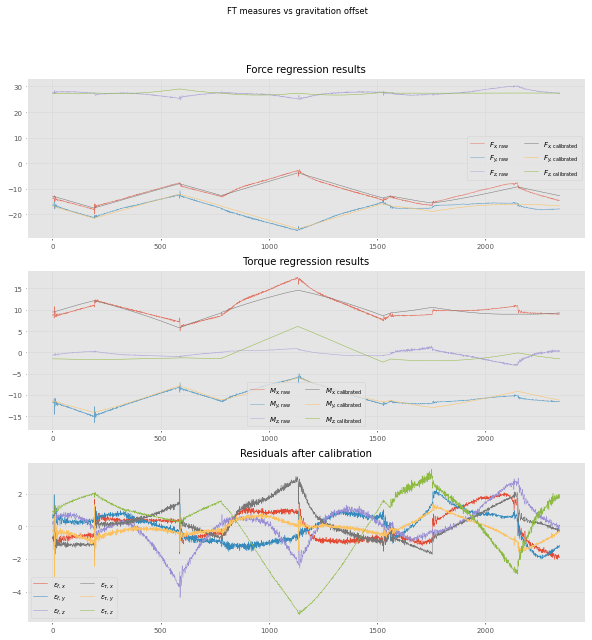

In [8]:
cobot.hz = 75.0
cobot.v_max = 0.01
try:
    cobot.init_sns_vel()
except RuntimeError as e:
    rospy.logerr(f"Exit: {e}")
    sys.exit(1)
cobot.change_tool("screwdriver", robot_urdf_prefix="hrr_cobot.")
cobot.run_calibration_routine(Path(f"/tmp/{cobot.tool}1.npy"), plot=True, figsize=(10, 10))

In [16]:
cobot.FT_F

array([ 17.01971, -25.74249,   0.2735 ,   6.31924,  13.90543,   0.82889])

In [16]:
print(cobot)

Hrr-Cobot state:
FT-data:
current force:	[-0.  0.  0.] [N]
current torque:	[-0.  0.  0.] [Nm]
current wrench:	[0. 0. 0. 0. 0. 0.] [N,Nm]
=>in contact:	False
---
Robot-data:
q:		[   5.58296  -22.96102 -102.75031   -5.61538   12.00271   82.23609][°]
q_dot:		[0. 0. 0. 0. 0. 0.][rad/s]
tau:		[0. 0. 0. 0. 0. 0.][Nm]
pos:		[ 0.35504 -0.03307  0.82089][m]
quat:		0.52899 <[-0.42335  0.57959 -0.45279]>
tool-pos:	[ 0.35504 -0.03307  0.82089][m]
tool-rpy:	[171.87903  85.25533 111.48055][°]
robot-status:	ready
---
tool set to screwdriver
E_p_EC:=[-0.      0.224   0.1475]
R_C_E:=[[ 0.  0. -1.]
 [-1.  0. -0.]
 [-0.  1.  0.]]
---


[WARN]Inbound TCP/IP connection failed: connection from sender terminated before handshake header received. 0 bytes were received. Please check sender for additional details.


In [20]:
cobot.T_B_C_robot, cobot.T_B_E_robot

(  -0.9547    0.2963   -0.02746   0.6229    
   0.2862    0.9396    0.188    -0.1856    
   0.08148   0.1716   -0.9818    0.2524    
   0         0         0         1         
,
   -0.2963   -0.02746   0.9547    0.4882    
  -0.9396    0.188    -0.2862   -0.1855    
  -0.1716   -0.9818   -0.08148   0.4844    
   0         0         0         1         
)

In [12]:
unscrew = UnscrewingSkill.from_ros(cobot=cobot,cobot_prefix="/hrr_cobot")

[INFO][/hrr_cobot_unscrewing_tests] could not get ROS-parameter /hrr_cobot/f_insert. Use default 10.0 instead.
[INFO][/hrr_cobot_unscrewing_tests] could not get ROS-parameter /hrr_cobot/insertion_distance. Use default 0.0015 instead.


TypeError: init_ros() missing 1 required keyword-only argument: 'cobot_prefix'

reset old stale values 

In [ ]:
stop_record()

## set action parameters

as shown below

current implementation is super sensitive to precision accuracy and needs further rework due to the new screwdriver,
but for initial testing should be fine
Use the rotation below to rotate the unitvector as needed

In [13]:
# action inputs

f_contact = 10.0
f_insert = 10.0
B_normal = sm.base.rotx(10, "deg") @ sm.base.unitvec(np.r_[0., 0.0, 1.0])
B_screw_guess = np.r_[0.59528, -0.19824, 0.30903] #np.r_[0.549, -0.145, 0.30]


In [ ]:
unscrew.set_skill(B_normal, B_screw_guess, f_contact, f_insert)

In [ ]:
unscrew.ξ = 0.2, 1e-4, 1e-3, 0.2

In [ ]:
unscrew.recovery()

In [38]:
cobot.T_B_C_robot

  -0.55      0.8343    0.03692   0.6173    
   0.8352    0.5493    0.02788  -0.1946    
   0.002978  0.04617  -0.9989    0.2851    
   0         0         0         1         


In [29]:
cobot.T_B_E_robot

  -0.8343    0.03692   0.55      0.5279    
  -0.5493    0.02788  -0.8352   -0.07768   
  -0.04617  -0.9989   -0.002978  0.5093    
   0         0         0         1         


In [39]:
B_screw_guess, cobot.T_B_C_robot.A[0:3,3]

(array([ 0.59528, -0.19824,  0.30903]), array([ 0.61729, -0.19462,  0.28505]))

In [28]:
print(cobot)

Hrr-Cobot state:
FT-data:
current force:	[-0.  0.  0.] [N]
current torque:	[-0.  0.  0.] [Nm]
current wrench:	[0. 0. 0. 0. 0. 0.] [N,Nm]
=>in contact:	False
---
Robot-data:
q:		[   1.28626   16.69762 -113.32567  113.83443   64.06477  -48.18092][°]
q_dot:		[0. 0. 0. 0. 0. 0.][rad/s]
tau:		[0. 0. 0. 0. 0. 0.][Nm]
pos:		[ 0.52789 -0.07768  0.50925][m]
quat:		0.21827 <[-0.18759  0.68286 -0.67147]>
tool-pos:	[ 0.52789 -0.07768  0.50925][m]
tool-rpy:	[-177.46609   33.3678    90.20433][°]
robot-status:	ready
---
tool set to screwdriver
E_p_EC:=[0.15839 0.15839 0.1475 ]
R_C_E:=[[ 0.       0.      -1.     ]
 [-0.70711  0.70711  0.     ]
 [ 0.70711  0.70711  0.     ]]
---


In [34]:
np.pi*5/4

3.9269908169872414

### Unscrewing fine tuning

In [ ]:
unscrew._screw_time = 5.0
unscrew._screwdriver_program = 1
unscrew._f_unscrew = -10.0

# run unscrewing

In [ ]:
try:
    record_skill(unscrew, hz=cobot.hz)
except RuntimeError:
    stop_record()
    unscrew.recovery()

In [ ]:
cobot.B_F_msr

## Test inverting direction

In [ ]:
import hrr_common as hc
hc.calc_EE_pre_pose(np.array([0,0,1]), safety_distance=0.05, )